## Explore Titanic Dataset 🔍

- ### **Read the description of the columns to understand what it is about:**<br>
https://www.kaggle.com/c/titanic/data 
<br><br>
- **Note:** Download train.csv

- ### **Analysis: what is your impression about the data? (ex: what column do you imagine will affect most in people survival).**


- ### **Read data, Hint: read about “sep” parameter in `read_csv()`.**


In [99]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df =pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- ### **Try to use info, describe, group by to help you analyze the data.**

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [102]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- ### **Deal with duplicates if exist.**

In [103]:
df[df.duplicated()]
#no dupllication

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


- ### **Handling missing values and why you used this approach?**

In [104]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df.shape

(891, 12)

In [106]:
df['Cabin'] = df['Cabin'].fillna(0)


In [107]:
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)

In [108]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

- ### **Use drop if needed.**

In [115]:
df['Embarked'].dropna()
#df.dropna(subset=['Embarked'], inplace=True)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [110]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

- ### **Save your modified dataframe.**

In [111]:
df.to_csv('Titanic_Dataset.csv')

- ### **What is your conclusion?** 🕵️‍♂️

In [112]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S


In [113]:
x = df.groupby('Sex')['Survived'].value_counts()
x

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

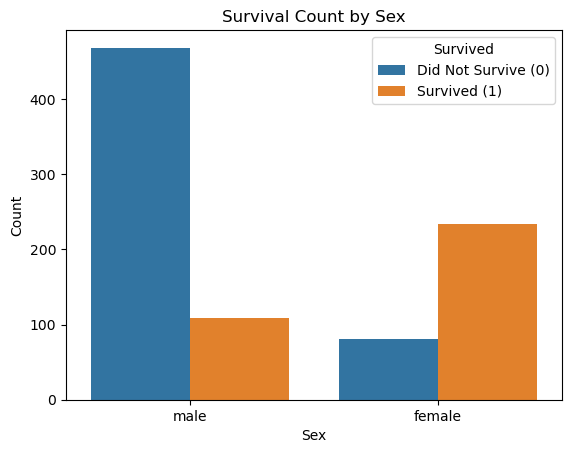

In [119]:
df['Survived'] = df['Survived'].astype(str)  


sns.countplot(data=df, x='Sex', hue='Survived')

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count by Sex")
plt.legend(title="Survived", labels=["Did Not Survive (0)", "Survived (1)"])

plt.show()


In [ ]:
#more female is servived   then male 

In [116]:
x = df.groupby('Pclass')['Survived'].value_counts()
x

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

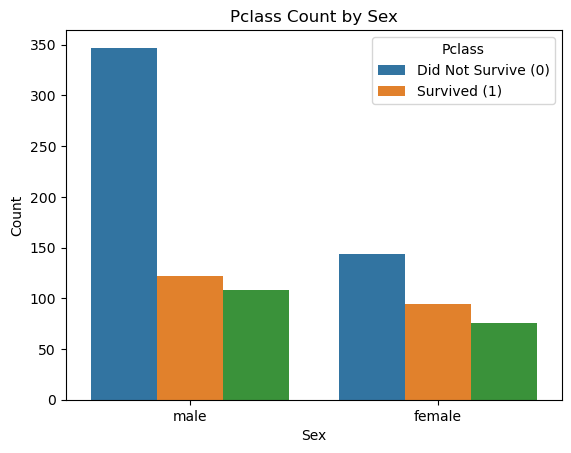

In [121]:
df['Pclass'] = df['Pclass'].astype(str)  


sns.countplot(data=df, x='Sex', hue='Pclass')

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Pclass Count by Sex")
plt.legend(title="Pclass", labels=["Did Not Survive (0)", "Survived (1)"])

plt.show()